<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-01-Dealing-With-Data/blob/master/DS-Sprint-01-Dealing-With-Data/pew_infoengagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
## http://www.pewinternet.org/dataset/sept-29-nov-6-2016-information-engaged-and-information-wary/ 

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

data_url = "/content/drive/My Drive/datasets/Pew_info_engage_wary/Pew_info_engaged_wary.csv"

# !ls "/content/drive/My Drive/datasets/Pew_info_engage_wary"

df = pd.read_csv(data_url)

In [288]:
df.describe()

df.head()


,psraid,sample,int_date,lang,comp,version,form,qs1,live1,q1a,...,hh3,ql1a,qc1,fips,usr,cregion,state,density,weight,standwt
0,100003,1,92916,1,1,1,1,,4,1,...,2,,,34029,S,1,34,4,2.235294,0.786190
1,100005,1,92916,1,1,1,2,,1,1,...,,,,36061,U,1,36,5,1.029412,0.362061
2,100008,1,92916,1,1,1,2,,4,3,...,,,,42039,R,1,42,1,3.029412,1.065495
3,100015,1,92916,1,1,1,2,,3,2,...,2,,,12057,U,3,12,4,2.617647,0.920670
4,100018,1,92916,1,1,1,1,,3,2,...,2,1,,34029,S,1,34,4,4.941176,1.737894


In [289]:
f = 'age' # main axis feature

gf1 = 'eminuse' # group feature 1
gf2 = 'libusea' # group feature 2

## for 'libusea', 1 or 2 means "has been to library", 3 means "not even once"

## we want a new 2-valued randvar constructed by saying "if (df[gf2]==1 or df[gf2]==2) then newRandVar==1 elif df[gf2]==3) then newRandVar==2"

assert len(df[gf2])==len(df[gf1])
N = len(df[gf1])

## we're gonna replace the below code with .replace(... inplace=true), so forget all this and forget df2

libraryUse  = [0] * len(df[gf2])
internetHas = [0] * len(df[gf1])

        # we'll do the same for gf1, so that don'tknow/refuse is concentrated to the same id as gf2
for j in range(N):
  if (df[gf1][j]==1): internetHas[j] = 1 
  elif (df[gf1][j]==2): internetHas[j] = 2
  else: internetHas[j] = 3

for i in range(N):
  if (df[gf2][i]==1 or df[gf2][i]==2): libraryUse[i] = 1
  elif (df[gf2][i]==3): libraryUse[i] = 2
  else: libraryUse[i] = 3

assert len(df[gf1])==len(internetHas)
assert len(df[gf2])==len(libraryUse)

#### I'M sure there's a more idiomatic pandas way to do this


df2 = df.copy()

df2[gf1] = internetHas
df2[gf2] = libraryUse


print(list(df[gf2]))
print(list(libraryUse))
print(list(df2[gf2]))

# print(list(df[gf1]))
# print(list(internetHas))
# print(list(df2[gf1]))

# df2[gf2].isna().sum()

print(df[gf1].dtypes)
print(df2[gf1].dtypes)




[1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 3, 1, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 2, 2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 

In [0]:
df[gf1].replace(to_replace=8, value=3, inplace=True)
df[gf1].replace(to_replace=9, value=3, inplace=True)

df[gf2].replace(to_replace=2, value=1, inplace=True)
df[gf2].replace(to_replace=3, value=2, inplace=True)
df[gf2].replace(to_replace=8, value=3, inplace=True)
df[gf2].replace(to_replace=9, value=3, inplace=True) 
## this code will cause big problems if its run multiple times, won't it? 
## ## ## but w df2 made the old way, and these assert statements, we're fine! 

for p in range(N): 
  assert df[gf1][p]==df2[gf1][p]
  assert df[gf2][p]==df2[gf2][p]


## ok now that we did that let's replace every single instance of df2 to df, lol

## every tiem you mess it up go back from cell 2

In [273]:
# hm... 

#" 1 means yes, 2 means no.  "

grouped_data1 = df[f].groupby(df[gf1])
# bp_call1 = [group for name, group in grouped_data1] 

grouped_data2 = df[f].groupby(df[gf2]) 
# bp_call2 = [group for name, group in grouped_data2]

## for each, 3 means "don't know / refused "

print(list([name for name, group in grouped_data1]))

[1, 2, 3]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


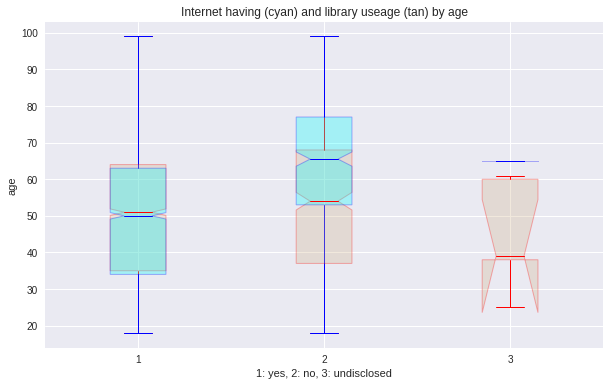

In [272]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_axisbelow(True)
ax.set_title('Internet having (cyan) and library useage (tan) by age')
ax.set_xlabel('1: yes, 2: no, 3: undisclosed')
ax.set_ylabel('age')

xtl = {1: "yes", 2: "no", 3: "undisclosed"}

def draw_plot(gdata, edge_color, fill_color):
  ## https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
    data = [group for name, group in gdata]
    # xtl = [name for name, group in gdata]
    bp = ax.boxplot(data, notch=True, patch_artist=True, boxprops=dict(alpha=.3))

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']: 
      patch.set(facecolor=fill_color)


draw_plot(grouped_data2, 'red', 'tan')

draw_plot(grouped_data1, 'blue', 'cyan')



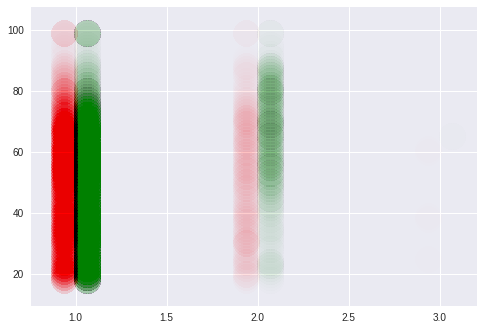

In [314]:
from collections import OrderedDict

# frequencies 
#print(sorted(df2[f].value_counts()))

age_counts = df2[f].value_counts().to_dict() 
#age_counts = OrderedDict(age_counts_unsorted.items())

for n in df2[f].unique():
  assert len(list(filter(lambda m: m==n, df2[f]))) == age_counts[n]


#print(age_counts)


# for k in range(N): 
#   s=0.001*age_counts[df2[f][k]]
#   plt.plot(df2[gf1][k], df[f][k], c='g', alpha=0.0059, markersize=12)
# # plt.show()

## LOL -- i just realized that i can't represent frequencies by size unless i did a two dimensional frequency-- if 123 30-yrolds said yes and 1 30yrold said no, the no person would be as large as the yes people, which isn't right. 

## SCRAPPING VARIABLE SIZE. 


# df2[gf1] = list(map(lambda x: x + 0.1, list(df2[gf1])))

def shift_left(x): return x + 0.065
def shift_right(x): return x - 0.065

df3 = df[[gf1,gf2]]

plt.scatter(list(map(shift_left, df[gf1])), df[f], c='g', alpha=0.0059, s=720); # internet has

plt.scatter(list(map(shift_right, df[gf2])), df[f], c='r', alpha=0.0057, s=720); # library uses

# print(age_counts[df2[f][22]])
# print(age_counts[df2[f][120]])
# print(age_counts[df2[f][1000]])

# print(df2[f])


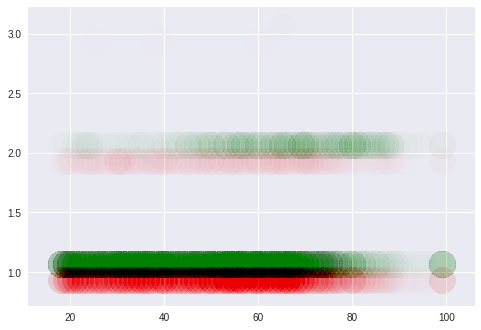

In [316]:
#plt.hist(df['age']); 

plt.scatter(df[f], list(map(shift_left, df[gf1])), c='g', alpha=0.0059, s=720); # internet has

plt.scatter(df[f], list(map(shift_right, df[gf2])), c='r', alpha=0.0057, s=720); # library uses


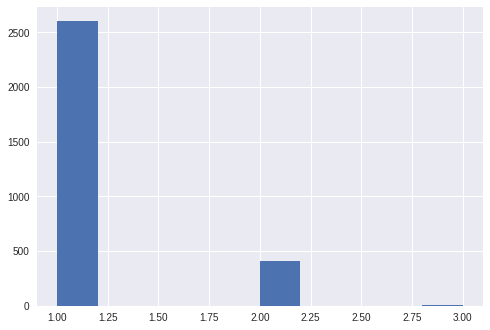

In [312]:
plt.hist(df['libusea']);

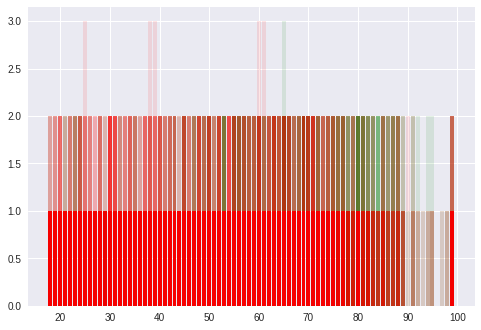

In [321]:

plt.bar(df[f], df[gf1], align='center', alpha=0.1, color='g');
plt.bar(df[f], df[gf2], align='center', alpha=0.1, color='r');
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')

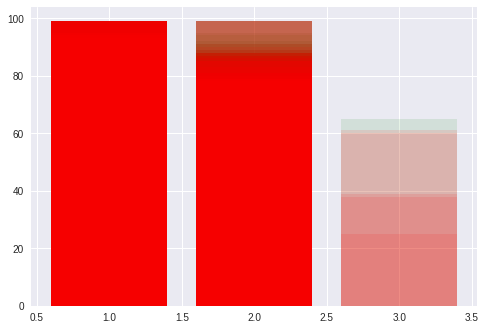

In [322]:

plt.bar(df[gf1], df[f], align='center', alpha=0.1, color='g');
plt.bar(df[gf2], df[f], align='center', alpha=0.1, color='r');